In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [4]:
ts_df = pd.read_csv("ts_data.csv")

In [6]:
ts_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [7]:
ts_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


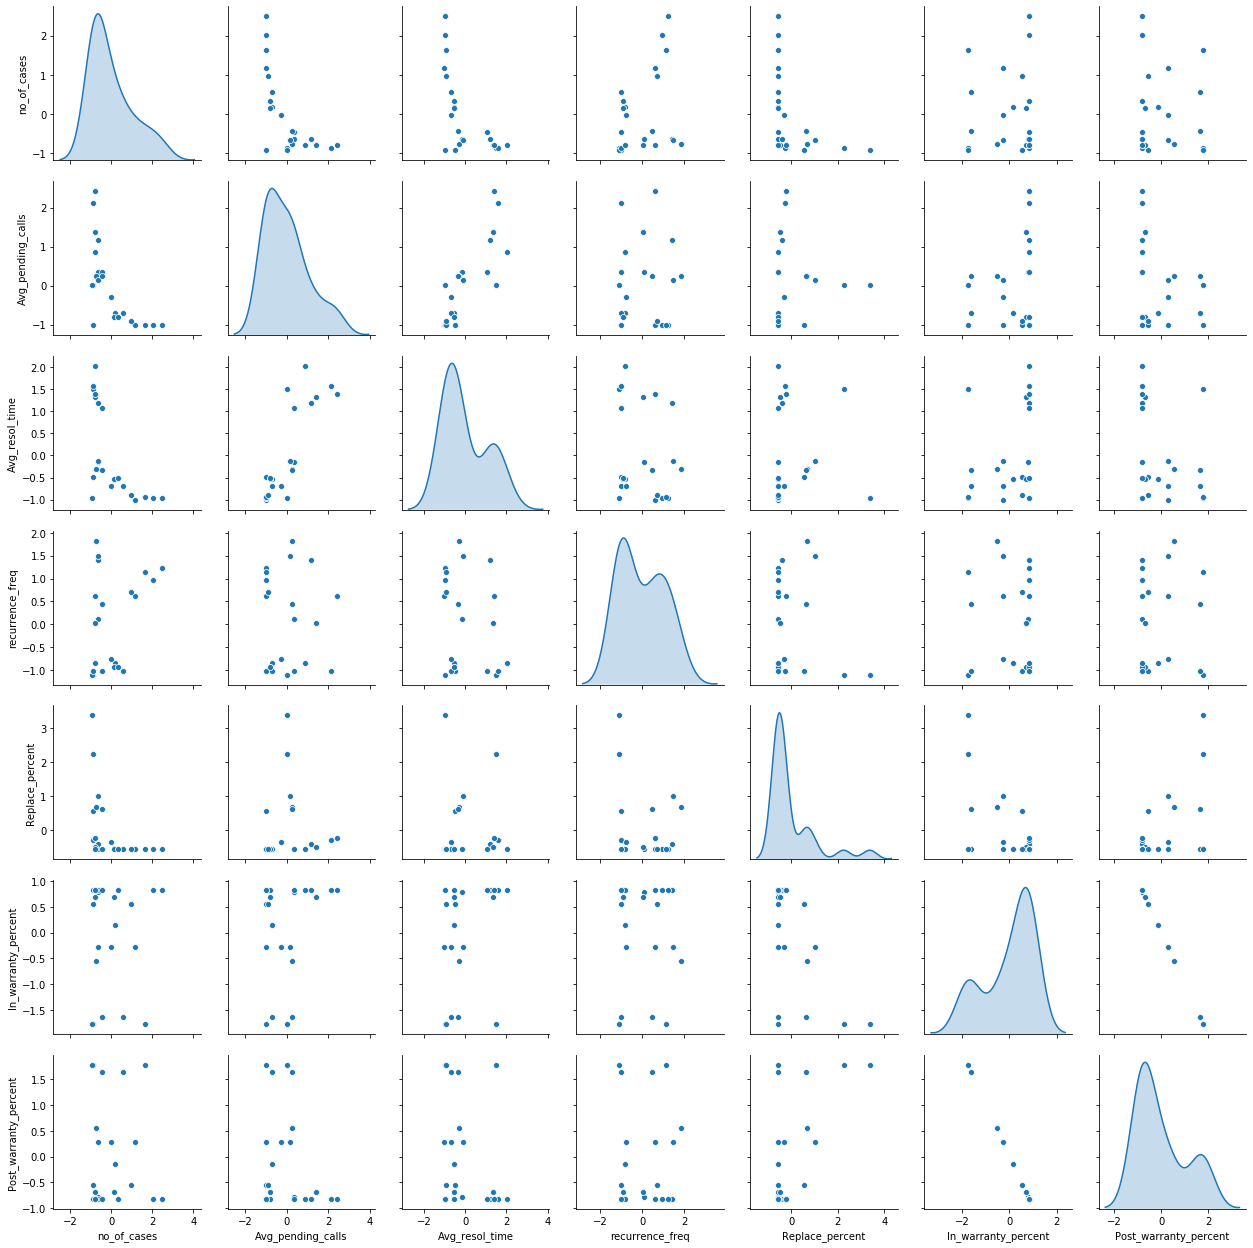

In [13]:
ts_new_df = ts_df.iloc[:,1:]
ts_new_df = ts_new_df.apply(stat.zscore)
sns.pairplot(ts_new_df, diag_kind = "kde")

In [14]:
ts_new_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074


In [15]:
ts_new_df.shape[0]

23

Text(0.5, 1.0, 'Selecting k with Elbow method')

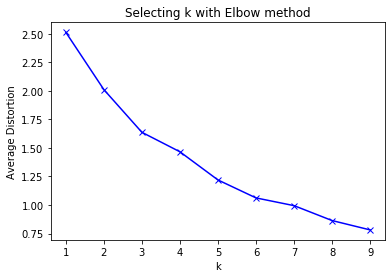

In [17]:
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

for k in clusters:
    k_mean = KMeans(n_clusters=k)
    k_mean.fit(ts_new_df)
    prediction = k_mean.predict(ts_new_df)
    meanDistortions.append(sum(np.min(cdist(ts_new_df, k_mean.cluster_centers_, "euclidean"), axis = 1))/ts_new_df.shape[0])

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with Elbow method")

In [18]:
k_means_final = KMeans(3)
k_means_final.fit(ts_new_df)
prediction = k_means_final.predict(ts_new_df)

ts_df["GROUP"] = prediction
ts_new_df["GROUP"] = prediction
print("Groups assigned : \n")
ts_df.head()

Groups assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,2
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,2
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [19]:
ts_clust = ts_new_df.groupby(["GROUP"])
ts_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,-0.710550,1.231151,1.208189,-0.104395,-0.44115,0.798984,-0.798984
1,-0.201991,-0.151228,-0.262973,0.240375,0.97053,-1.348020,1.348020
2,0.709754,-0.839940,-0.735168,-0.105763,-0.41174,0.427028,-0.427028


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A2BBE6CF8>,
      dtype=object)

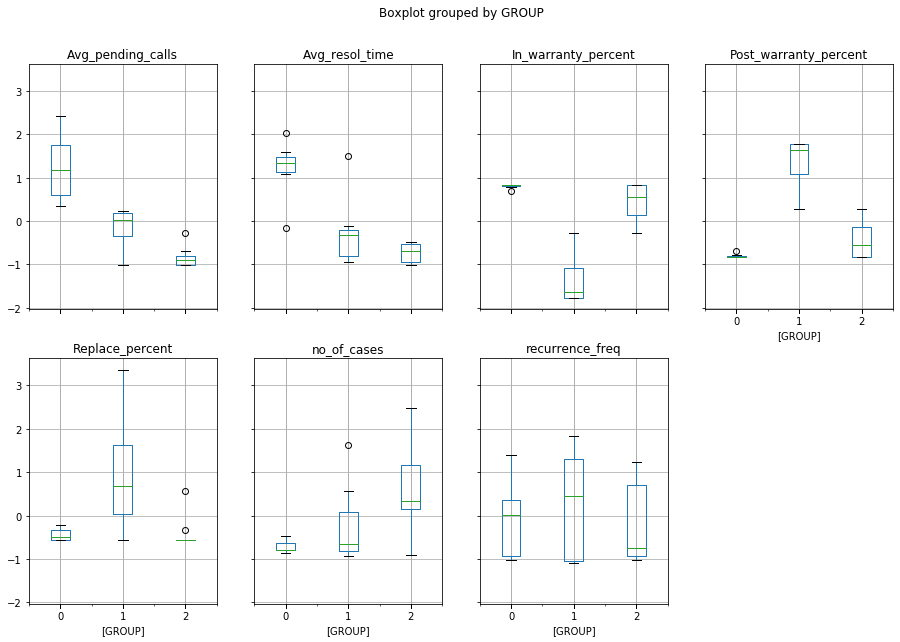

In [21]:
ts_new_df.boxplot(by = "GROUP", layout = (2,4), figsize = (15,10))

In [22]:
k_means_final = KMeans(5)
k_means_final.fit(ts_new_df)
prediction = k_means_final.predict(ts_new_df)

ts_df["GROUP"] = prediction
ts_new_df["GROUP"] = prediction
print("Groups assigned : \n")
ts_df.head()

Groups assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [23]:
ts_clust = ts_new_df.groupby(["GROUP"])
ts_clust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,-0.891842,0.027143,0.277859,-1.101765,2.807317,-1.778204,1.778204
1,-0.053943,-0.722017,-0.555718,-0.894903,-0.291961,0.384444,-0.384444
2,-0.710550,1.231151,1.208189,-0.104395,-0.441150,0.798984,-0.798984
3,0.073950,-0.222577,-0.479306,0.777232,0.235815,-1.175947,1.175947
4,1.664375,-0.987344,-0.959481,0.880663,-0.561463,0.480258,-0.480258


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A2DC03E80>,
      dtype=object)

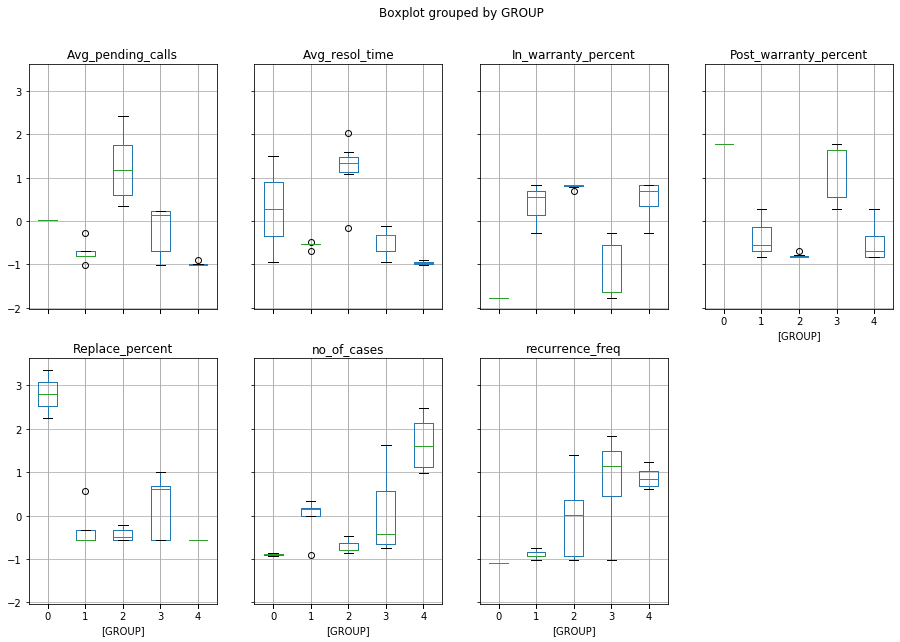

In [24]:
ts_new_df.boxplot(by = "GROUP", layout = (2,4), figsize = (15,10))

In [31]:
k_means_final = KMeans(4)
k_means_final.fit_transform(ts_new_df)

array([[3.16560697, 3.16391974, 4.70149373, 0.50190351],
       [5.71359186, 5.20218839, 1.35514062, 4.72467974],
       [3.85646702, 3.30285206, 4.30662173, 1.27142459],
       [5.88453636, 6.24245498, 1.35514062, 5.02706281],
       [2.99690001, 1.64921128, 5.51319792, 2.01105786],
       [3.77576096, 1.50663569, 6.02011973, 3.69412773],
       [4.86610076, 1.33703788, 5.75309619, 3.82414663],
       [3.50162464, 3.10686976, 5.1919128 , 0.55006477],
       [1.02896639, 4.50993112, 6.46990982, 3.74646147],
       [3.97447094, 0.30180372, 5.59736117, 3.25781597],
       [4.58508169, 1.42439209, 6.05506231, 4.22941531],
       [2.59296938, 4.77098807, 4.90116275, 3.56510371],
       [3.5665918 , 3.1493046 , 5.36019634, 0.78350186],
       [4.48746484, 1.17607233, 5.72044691, 3.34476041],
       [2.35228603, 4.72925917, 7.50115747, 4.18212687],
       [2.65431331, 5.07938857, 7.76868481, 4.54598977],
       [2.24945066, 5.56461503, 5.85573987, 4.5420457 ],
       [3.04821413, 3.18305747,

In [30]:
ts_new_df

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,2
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,2
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,2
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,1
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,4
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,2
